# Xebra rLY vs z - MC vs data
**Status:** September 2019

In [1]:
## Check Python version:
!python -V
## Check ROOT version:
!which root

Python 3.7.3


## Imports and function definitions

In [2]:
## Imports:

import glob

import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
from matplotlib import transforms
%matplotlib inline

import uproot                              # uproot for easy import of ROOT tree contents
import collections                         # used for named tuples
import pandas as pd
import math
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from numpy import exp
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline

In [3]:
## Function definitions:

def f_polar_R(cartesian_x, cartesian_y):
    return np.sqrt(cartesian_x * cartesian_x + cartesian_y * cartesian_y)

def f_polar_Phi(cartesian_x, cartesian_y):
    return np.arctan2(cartesian_y, cartesian_x)

def f_distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_b - x_a)**2 + (y_b - y_a)**2)


def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]


def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

## Data imports and processing

### Simulation data - Optical parameter scan

In [4]:
filename_prefix_sim = "optPhot_S1_1.0e+07_pmtGap4.5"

In [5]:
glob_list = glob.glob("/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/"+filename_prefix_sim+"*_LCE_z_hist.pkl")
print(len(glob_list))
glob_list

113


['/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.3_LXeAbs1000_Tmesh0.89770509_LCE_z_hist.pkl',
 '/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs10000_Tmesh0.89770509_LCE_z_hist.pkl',
 '/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.99_LXeAbs1000_Tmesh0.93_LCE_z_hist.pkl',
 '/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.99_LXeAbs1000_Tmesh0.95_LCE_z_hist.pkl',
 '/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.99_LXeAbs1000_Tmesh0.97_LCE_z_hist.pkl',
 '/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/Influence_optical_parameters_rLY_vs_Z/optPhot_S1_1.0e+07_pmtGap4.5_RPTFE0.99_LXeAbs1000_Tmesh0.999_LC

In [6]:
df_sim = pd.DataFrame(data={'RPTFE': [], 'LXeAbs': [], 'Tmesh': [], 
                            'rLY_all': [], 'rLY_top': [], 'rLY_bottom': []})
columns = ['RPTFE', 'LXeAbs', 'Tmesh', 'rLY_all', 'rLY_top', 'rLY_bottom']

print_counter = 0
iterable_list = glob_list
for ind, glob_list_el in enumerate(iterable_list, 1):

    loc_RPTFE = glob_list_el.find('RPTFE')
    loc_LXeAbs = glob_list_el.find('LXeAbs')
    loc_Tmesh = glob_list_el.find('Tmesh')
    loc_LCE_z_hist = glob_list_el.find('LCE_z_hist')

    RPTFE  = glob_list_el[loc_RPTFE+5:loc_LXeAbs-1]
    LXeAbs = glob_list_el[loc_LXeAbs+6:loc_Tmesh-1]
    Tmesh  = glob_list_el[loc_Tmesh+5:loc_LCE_z_hist-1]

    LCE_z_hist = pd.read_pickle(glob_list_el)
    rLY_all    = LCE_z_hist['rLY']['all']
    rLY_top    = LCE_z_hist['rLY']['top']
    rLY_bottom = LCE_z_hist['rLY']['bottom']
    
    df_sim = df_sim.append(pd.DataFrame(data={'RPTFE': [RPTFE], 'LXeAbs': [LXeAbs], 
                                 'Tmesh': [Tmesh], 'rLY_all': [rLY_all], 
                                 'rLY_top': [rLY_top], 'rLY_bottom': [rLY_bottom]}), 
              ignore_index=True)
    
    if ind / len(iterable_list) >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1

df_sim.to_pickle(filename_prefix_sim+"_rLY_vs_z_influence_optical_parameters.pkl")
#df_sim.head()

0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 

In [7]:
df_sim

,RPTFE,LXeAbs,Tmesh,rLY_all,rLY_top,rLY_bottom
0,0.3,1000,0.89770509,"[1.9201167750562957, 1.8581281544232837, 1.835...","[0.5734202462752545, 0.5833011803867024, 0.600...","[2.0843836683302457, 2.013628567479497, 1.9864..."
1,0.95,10000,0.89770509,"[1.2125570623176023, 1.2209873242500038, 1.221...","[0.6114049657283163, 0.6313981477135467, 0.631...","[1.2717912237976519, 1.2790821403339783, 1.279..."
2,0.99,1000,0.93,"[1.1442130885710262, 1.145948477742548, 1.1466...","[0.6148738717404924, 0.6351152838896308, 0.642...","[1.2021334052542074, 1.2018438647070735, 1.201..."
3,0.99,1000,0.95,"[1.12115602773363, 1.1276663990618454, 1.13023...","[0.6088975957687809, 0.6280148957033082, 0.656...","[1.180794931471064, 1.1858375604359324, 1.1854..."
4,0.99,1000,0.97,"[1.0932941725221035, 1.1045827696269028, 1.101...","[0.6165654466418682, 0.6250254115912297, 0.639...","[1.152324114023048, 1.163962960612719, 1.15887..."
5,0.99,1000,0.999,"[1.0517247296995649, 1.0597290573289193, 1.057...","[0.621224294086754, 0.6215528416987853, 0.6452...","[1.1101470550746853, 1.1191930469640106, 1.113..."
6,0.99,1000,0.89770509,"[1.1702313551019417, 1.1831025234931807, 1.176...","[0.606101538045803, 0.6436074371680012, 0.6369...","[1.2263365197224574, 1.2367576569661582, 1.230..."
7,0.99,1000,0.85,"[1.2078149096459008, 1.2067514447146188, 1.211...","[0.6122386129938024, 0.6054561161118335, 0.637...","[1.2588021144500763, 1.2582282550571449, 1.261..."
8,0.95,20,0.89770509,"[1.6020637621601703, 1.5957634051890852, 1.582...","[0.5167005281141749, 0.5211315289138323, 0.538...","[1.7248079573721917, 1.7172939865326953, 1.701..."
9,0.99,10000,0.89770509,"[1.1625734114649429, 1.1702618306199712, 1.172...","[0.5967210343983965, 0.6229674042559504, 0.649...","[1.2184002044583622, 1.2242577028392785, 1.223..."


### Simulation data - Default parameter

In [8]:
! ls /media/alex/TOSHIBA\ EXT/Thesis/Simulation_Outputs/LCE/optPhot_S1_*_LCE_z_hist.pkl

'/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/LCE/optPhot_S1_1.0e+06_pmtGap0.0_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_LCE_z_hist.pkl'
'/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/LCE/optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_LCE_z_hist.pkl'
'/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/LCE/optPhot_S1_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_down_LCE_z_hist.pkl'
'/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/LCE/optPhot_S1_3.0e+07_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_up_LCE_z_hist.pkl'


In [9]:
filename_prefix_sim_default = "optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04"
df_sim_default = pd.read_pickle('/media/alex/TOSHIBA EXT/Thesis/Simulation_Outputs/LCE/'+filename_prefix_sim_default+'_LCE_z_hist.pkl')

In [10]:
df_sim_default

,n_total,n_hits,bins_z,binscenter_z,LCE,rLCE,DE,LY,LY0,rLY
all,"[14266.0, 14506.0, 14230.0, 14216.0, 14257.0, ...","[5332.327, 5436.5059, 5318.574900000001, 5290....","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.37377870461236506, 0.3747763615055839, 0.37...","[1.2655870049808737, 1.2689649973167312, 1.265...","[0.11319188155404455, 0.11342787026919898, 0.1...","[4.586610954333137, 4.59617337534042, 4.581120...","[7.729449036836445, 7.745563821059585, 7.72019...","[1.2951605850590757, 1.2978608077092382, 1.293..."
top,"[14266.0, 14506.0, 14230.0, 14216.0, 14257.0, ...","[319.6007999999999, 335.55959999999976, 337.39...","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.022402972101500062, 0.023132469323038727, 0...","[0.5836782041864143, 0.6026842372385268, 0.617...","[0.004704624141315013, 0.004857818557838132, 0...","[0.190634525429925, 0.19684206592948045, 0.201...","[0.32126113673976164, 0.3317222088501142, 0.34...","[0.5836782041864144, 0.6026842372385269, 0.617..."
bottom,"[14266.0, 14506.0, 14230.0, 14216.0, 14257.0, ...","[5012.726199999999, 5100.946300000001, 4981.17...","[-71.35, -70.332855, -69.31571, -68.29857, -67...","[-70.84143, -69.82428, -68.807144, -67.78999, ...","[0.35137573251086496, 0.35164389218254527, 0.3...","[1.3674453643703854, 1.368488958637212, 1.3622...","[0.10848725741272955, 0.10857005171136085, 0.1...","[4.395976428903213, 4.39933130941094, 4.379362...","[7.408187900096684, 7.41384161220947, 7.380189...","[1.367445364370385, 1.3684889586372115, 1.3622..."


In [24]:
rLY_sim_default_all    = df_sim_default['rLY']['all']
rLY_sim_default_top    = df_sim_default['rLY']['top']
rLY_sim_default_bottom = df_sim_default['rLY']['bottom']

### Simulation data

In [11]:
ls /home/alex/Thesis-Copy/Xebra_Measurements_Analysis/Z_Position/output/*.pkl

/home/alex/Thesis-Copy/Xebra_Measurements_Analysis/Z_Position/output/run_00158_rLY_hist_z.pkl


In [12]:
filename_prefix_meas = "run_00158"
df_meas = pd.read_pickle('/home/alex/Thesis-Copy/Xebra_Measurements_Analysis/Z_Position/output/'+filename_prefix_meas+'_rLY_hist_z.pkl')

In [13]:
df_meas

,bin_centers,all_statistic_mean,all_statistic_std_red,bottom_statistic_mean,bottom_statistic_std_red,top_statistic_mean,top_statistic_std_red
0,-70.841429,1.164665,0.010939,1.203251,0.011459,0.770436,0.017169
1,-69.824286,1.190379,0.008484,1.231475,0.009220,0.781091,0.016870
2,-68.807143,1.188086,0.008334,1.227056,0.008939,0.794601,0.015526
3,-67.790000,1.181953,0.008017,1.221609,0.008613,0.775028,0.016170
4,-66.772857,1.176967,0.009134,1.213619,0.009648,0.806064,0.016353
5,-65.755714,1.194178,0.008378,1.230267,0.008776,0.800057,0.017315
6,-64.738571,1.170904,0.008323,1.205715,0.008740,0.829038,0.015859
7,-63.721429,1.182780,0.008129,1.215914,0.008512,0.831897,0.016716
8,-62.704286,1.167155,0.008444,1.199744,0.008841,0.820944,0.017298
9,-61.687143,1.163417,0.008467,1.192462,0.008718,0.868228,0.017732


In [19]:
bin_centers = np.array(df_meas['bin_centers'])

rLY_meas_all = np.array(df_meas['all_statistic_mean'])
rLY_meas_top = np.array(df_meas['top_statistic_mean'])
rLY_meas_bottom = np.array(df_meas['bottom_statistic_mean'])

rLY_meas_all_err = np.array(df_meas['all_statistic_std_red'])
rLY_meas_top_err = np.array(df_meas['top_statistic_std_red'])
rLY_meas_bottom_err = np.array(df_meas['bottom_statistic_std_red'])

## Comparison simulation vs measurement

### Separate Plots

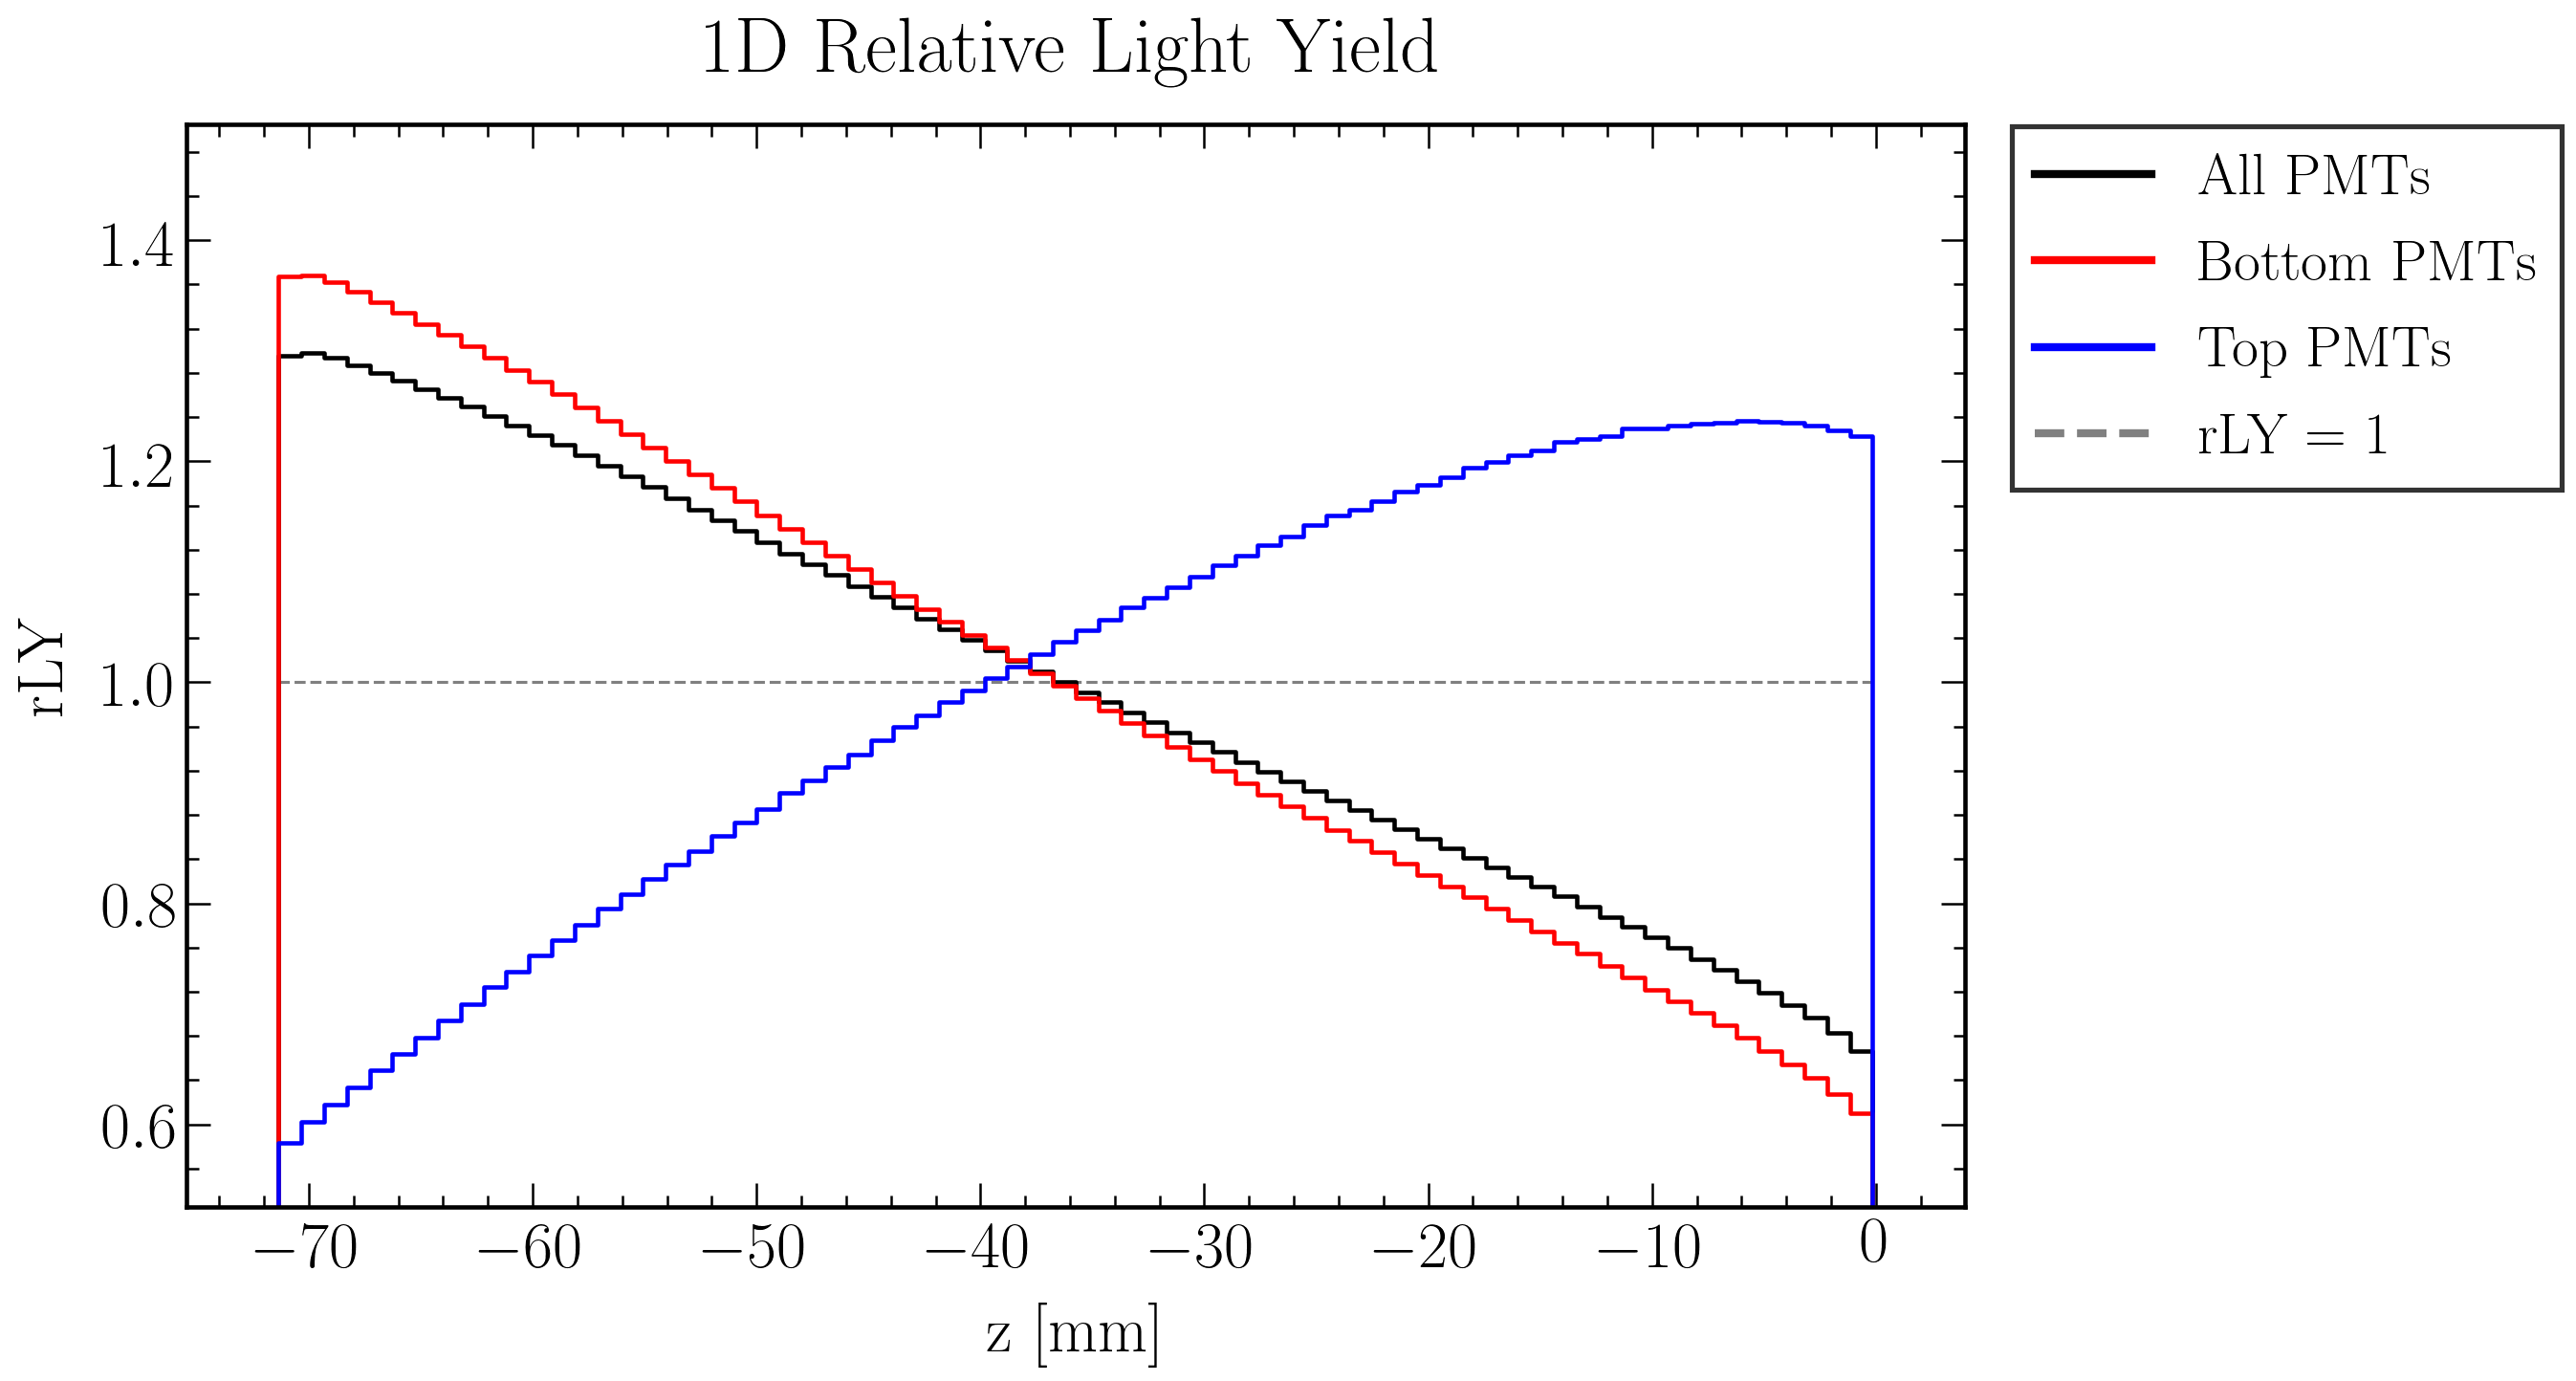

In [28]:
## rLY_sim_default

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

bns = np.concatenate((np.array([2*bin_centers[0]-bin_centers[1]]), bin_centers, np.array([2*bin_centers[-1]-bin_centers[-2]])))
ns = np.concatenate((np.array([0]), rLY_sim_default_all, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
ns = np.concatenate((np.array([0]), rLY_sim_default_bottom, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
ns = np.concatenate((np.array([0]), rLY_sim_default_top, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
#plt.ylim(bottom = 0)
plt.ylim(0.9*np.min([np.min(rLY_sim_default_top), 
       np.min(rLY_sim_default_bottom), 
       np.min(rLY_sim_default_all)]), 
         1.1*np.max([np.max(rLY_sim_default_top), 
       np.max(rLY_sim_default_bottom), 
       np.max(rLY_sim_default_all)]))

plt.show()

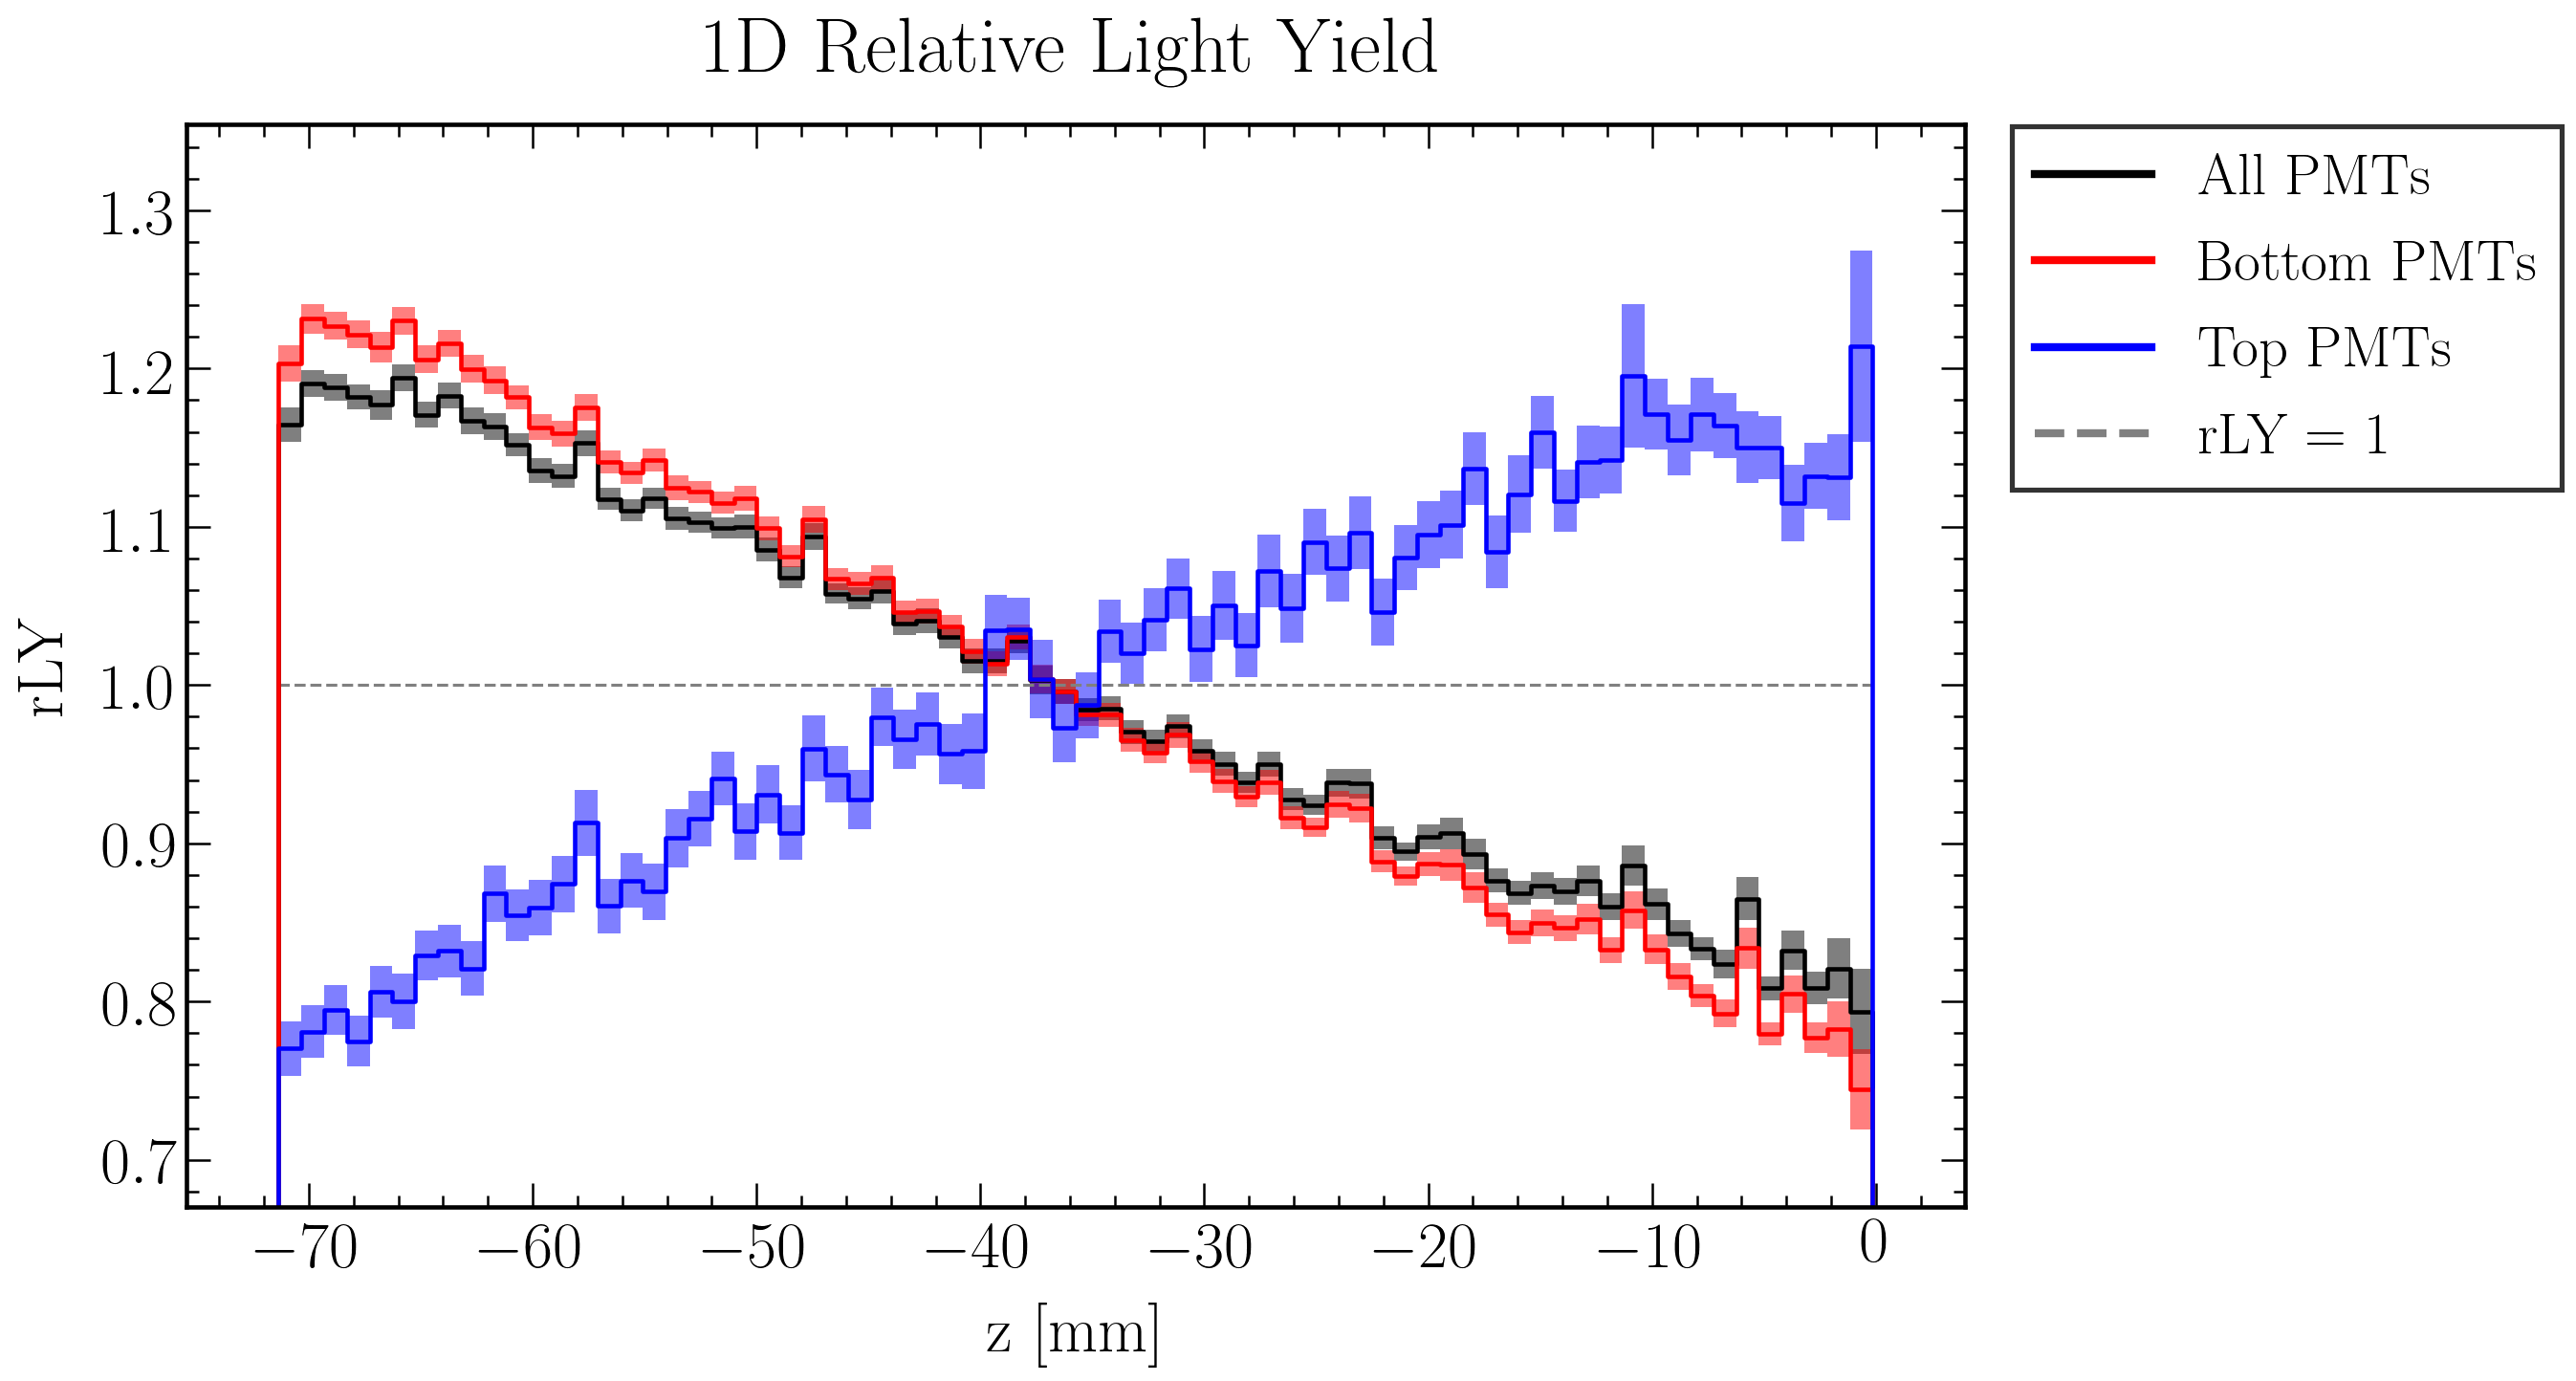

In [34]:
## rLY_meas

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

bns = np.concatenate((np.array([2*bin_centers[0]-bin_centers[1]]), bin_centers, np.array([2*bin_centers[-1]-bin_centers[-2]])))

ns = np.concatenate((np.array([0]), rLY_meas_all, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_all_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='k', alpha=0.5, step = 'mid')

ns = np.concatenate((np.array([0]), rLY_meas_bottom, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_bottom_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='r', alpha=0.5, step = 'mid')

ns = np.concatenate((np.array([0]), rLY_meas_top, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_top_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='b', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
#plt.ylim(bottom = 0)
plt.ylim(0.9*np.min([np.min(rLY_meas_top), 
       np.min(rLY_meas_bottom), 
       np.min(rLY_meas_all)]), 
         1.1*np.max([np.max(rLY_meas_top), 
       np.max(rLY_meas_bottom), 
       np.max(rLY_meas_all)]))

fig.savefig(filename_prefix_meas+"_rLY_z_comparison_scaled.png", bbox_inches='tight')

plt.show()

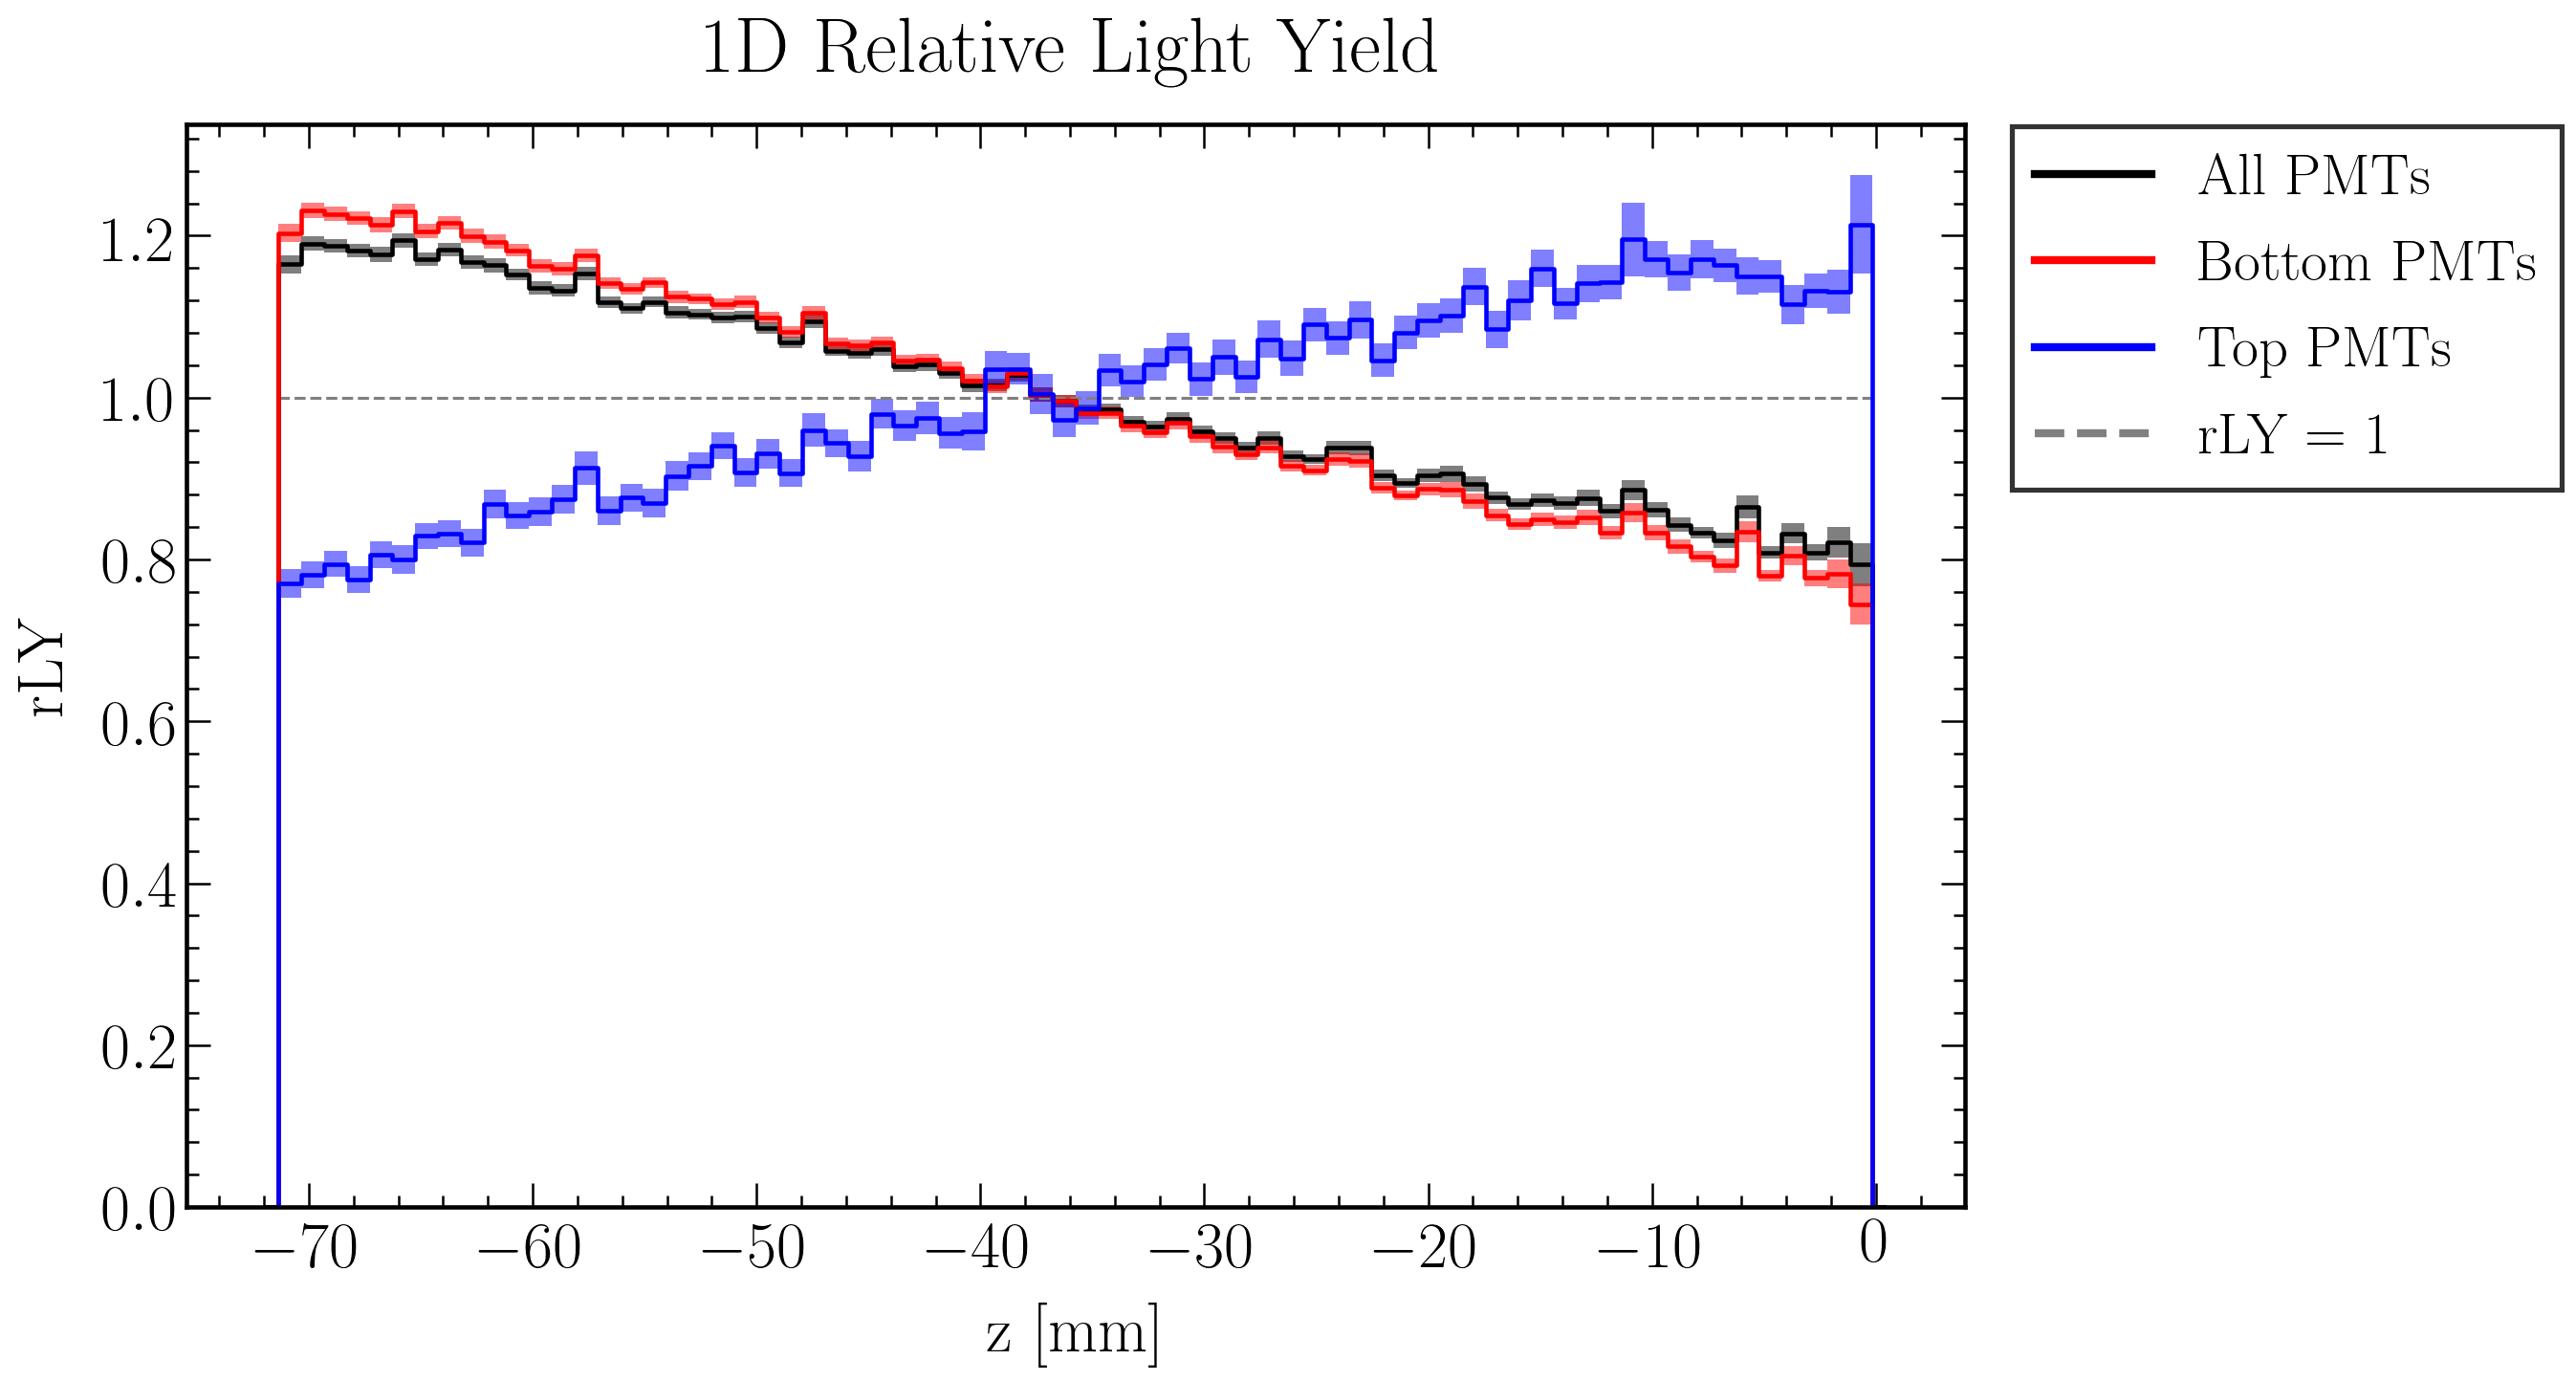

In [35]:
## rLY_meas

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

bns = np.concatenate((np.array([2*bin_centers[0]-bin_centers[1]]), bin_centers, np.array([2*bin_centers[-1]-bin_centers[-2]])))

ns = np.concatenate((np.array([0]), rLY_meas_all, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_all_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='k', alpha=0.5, step = 'mid')

ns = np.concatenate((np.array([0]), rLY_meas_bottom, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_bottom_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMTs', color = 'r')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='r', alpha=0.5, step = 'mid')

ns = np.concatenate((np.array([0]), rLY_meas_top, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_top_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='b', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('1D Relative Light Yield', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
#plt.xlim(0,100)
#plt.ylim(-10,180)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')
plt.ylim(bottom = 0)

fig.savefig(filename_prefix_meas+"_rLY_z_comparison.png", bbox_inches='tight')

plt.show()

### Default optical parameters

#### Bottom

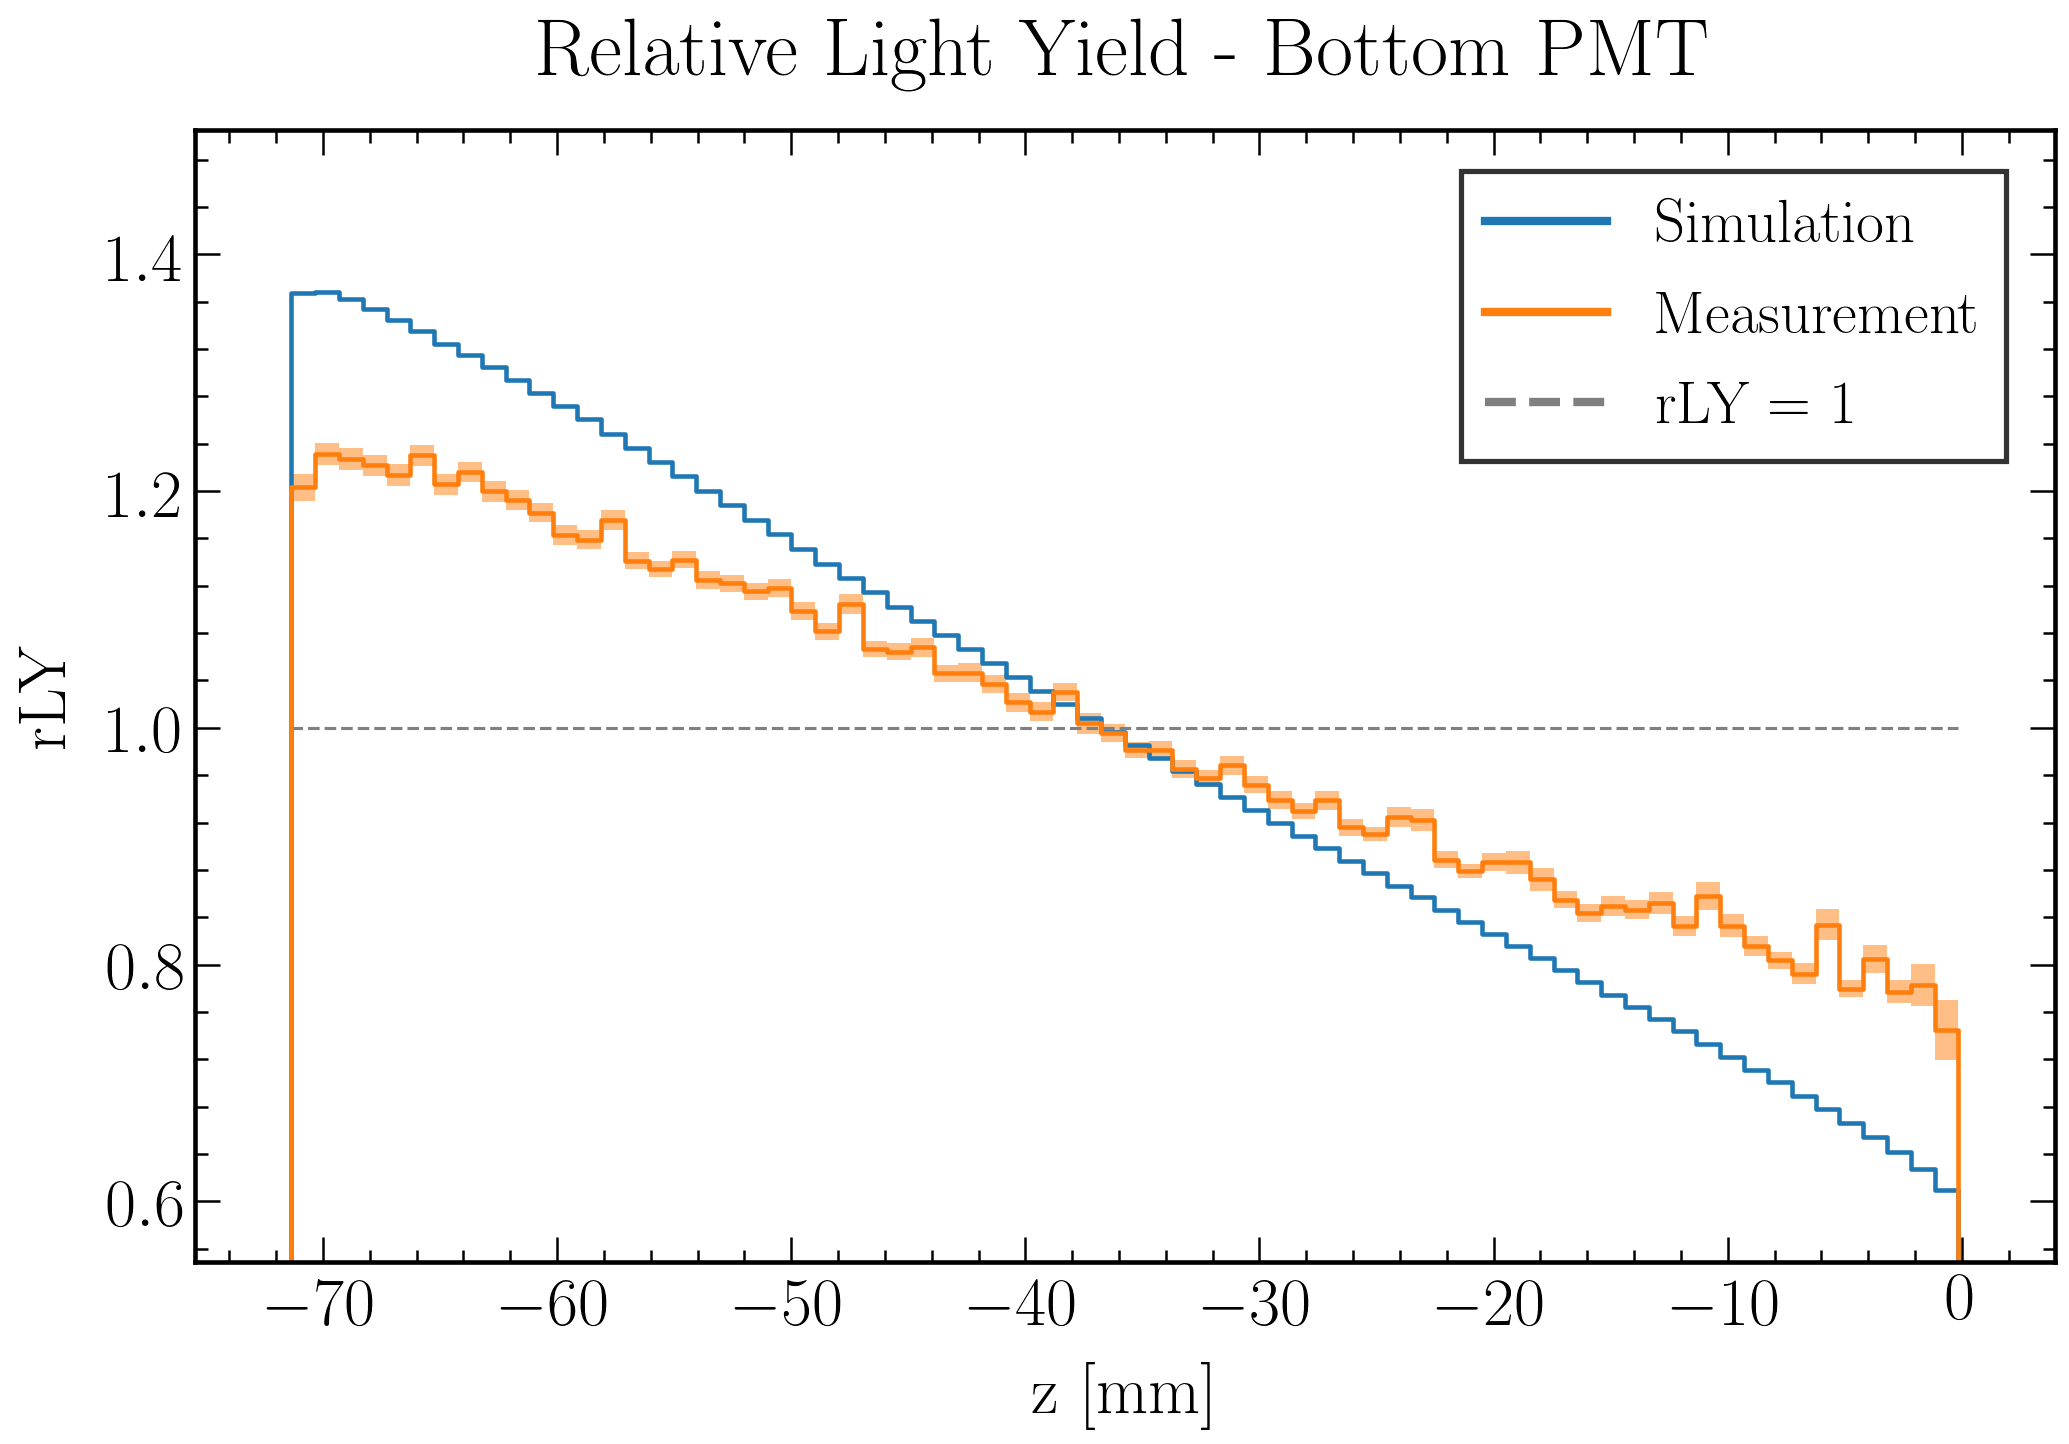

In [140]:
## rLY_sim_default

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

ns = np.concatenate((np.array([0]), rLY_sim_default_bottom, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Simulation', color = 'C0')

ns = np.concatenate((np.array([0]), rLY_meas_bottom, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_bottom_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Measurement', color = 'C1')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='C1', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('Relative Light Yield - Bottom PMT', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
plt.ylim(0.9*np.min([np.min(rLY_meas_bottom), 
       np.min(rLY_sim_default_bottom)]), 
         1.1*np.max([np.max(rLY_meas_bottom), 
       np.max(rLY_sim_default_bottom)]))

fig.savefig(filename_prefix_sim_default+"_vs_"+filename_prefix_meas+"_rLY_z_bottom.png", bbox_inches='tight')

plt.show()

In [141]:
## Reduced chi-squared statistic
np.sum((rLY_meas_bottom - rLY_sim_default_bottom)**2 / (rLY_meas_bottom_err)**2) / len(rLY_meas_bottom)

85.02286479983795

In [142]:
def rLY_meas_bottom_shifted(shift_rLY):
    rLY_meas_bottom_shifted = (rLY_meas_bottom - shift_rLY) / (np.mean(rLY_meas_bottom - shift_rLY))
    return rLY_meas_bottom_shifted

def chi_squared_red_bottom_shifted(shift_rLY):
    chi_squared_red_bottom_shifted = np.sum((rLY_meas_bottom_shifted(shift_rLY) - rLY_sim_default_bottom)**2 / (rLY_meas_bottom_err)**2) / len(rLY_meas_bottom)
    return chi_squared_red_bottom_shifted

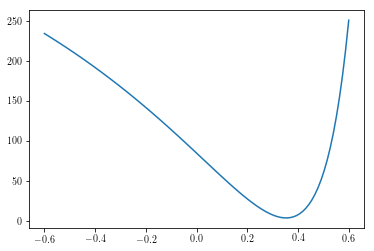

In [143]:
x = np.linspace(-0.6,0.6,100)
plt.plot(x, np.array([chi_squared_red_bottom_shifted(i) for i in x]))
plt.show()

In [144]:
shift = minimize(chi_squared_red_bottom_shifted, x0 = -0.1).x[0]
print(shift)
print(chi_squared_red_bottom_shifted(shift))

0.35327124897452455
4.105519020344655


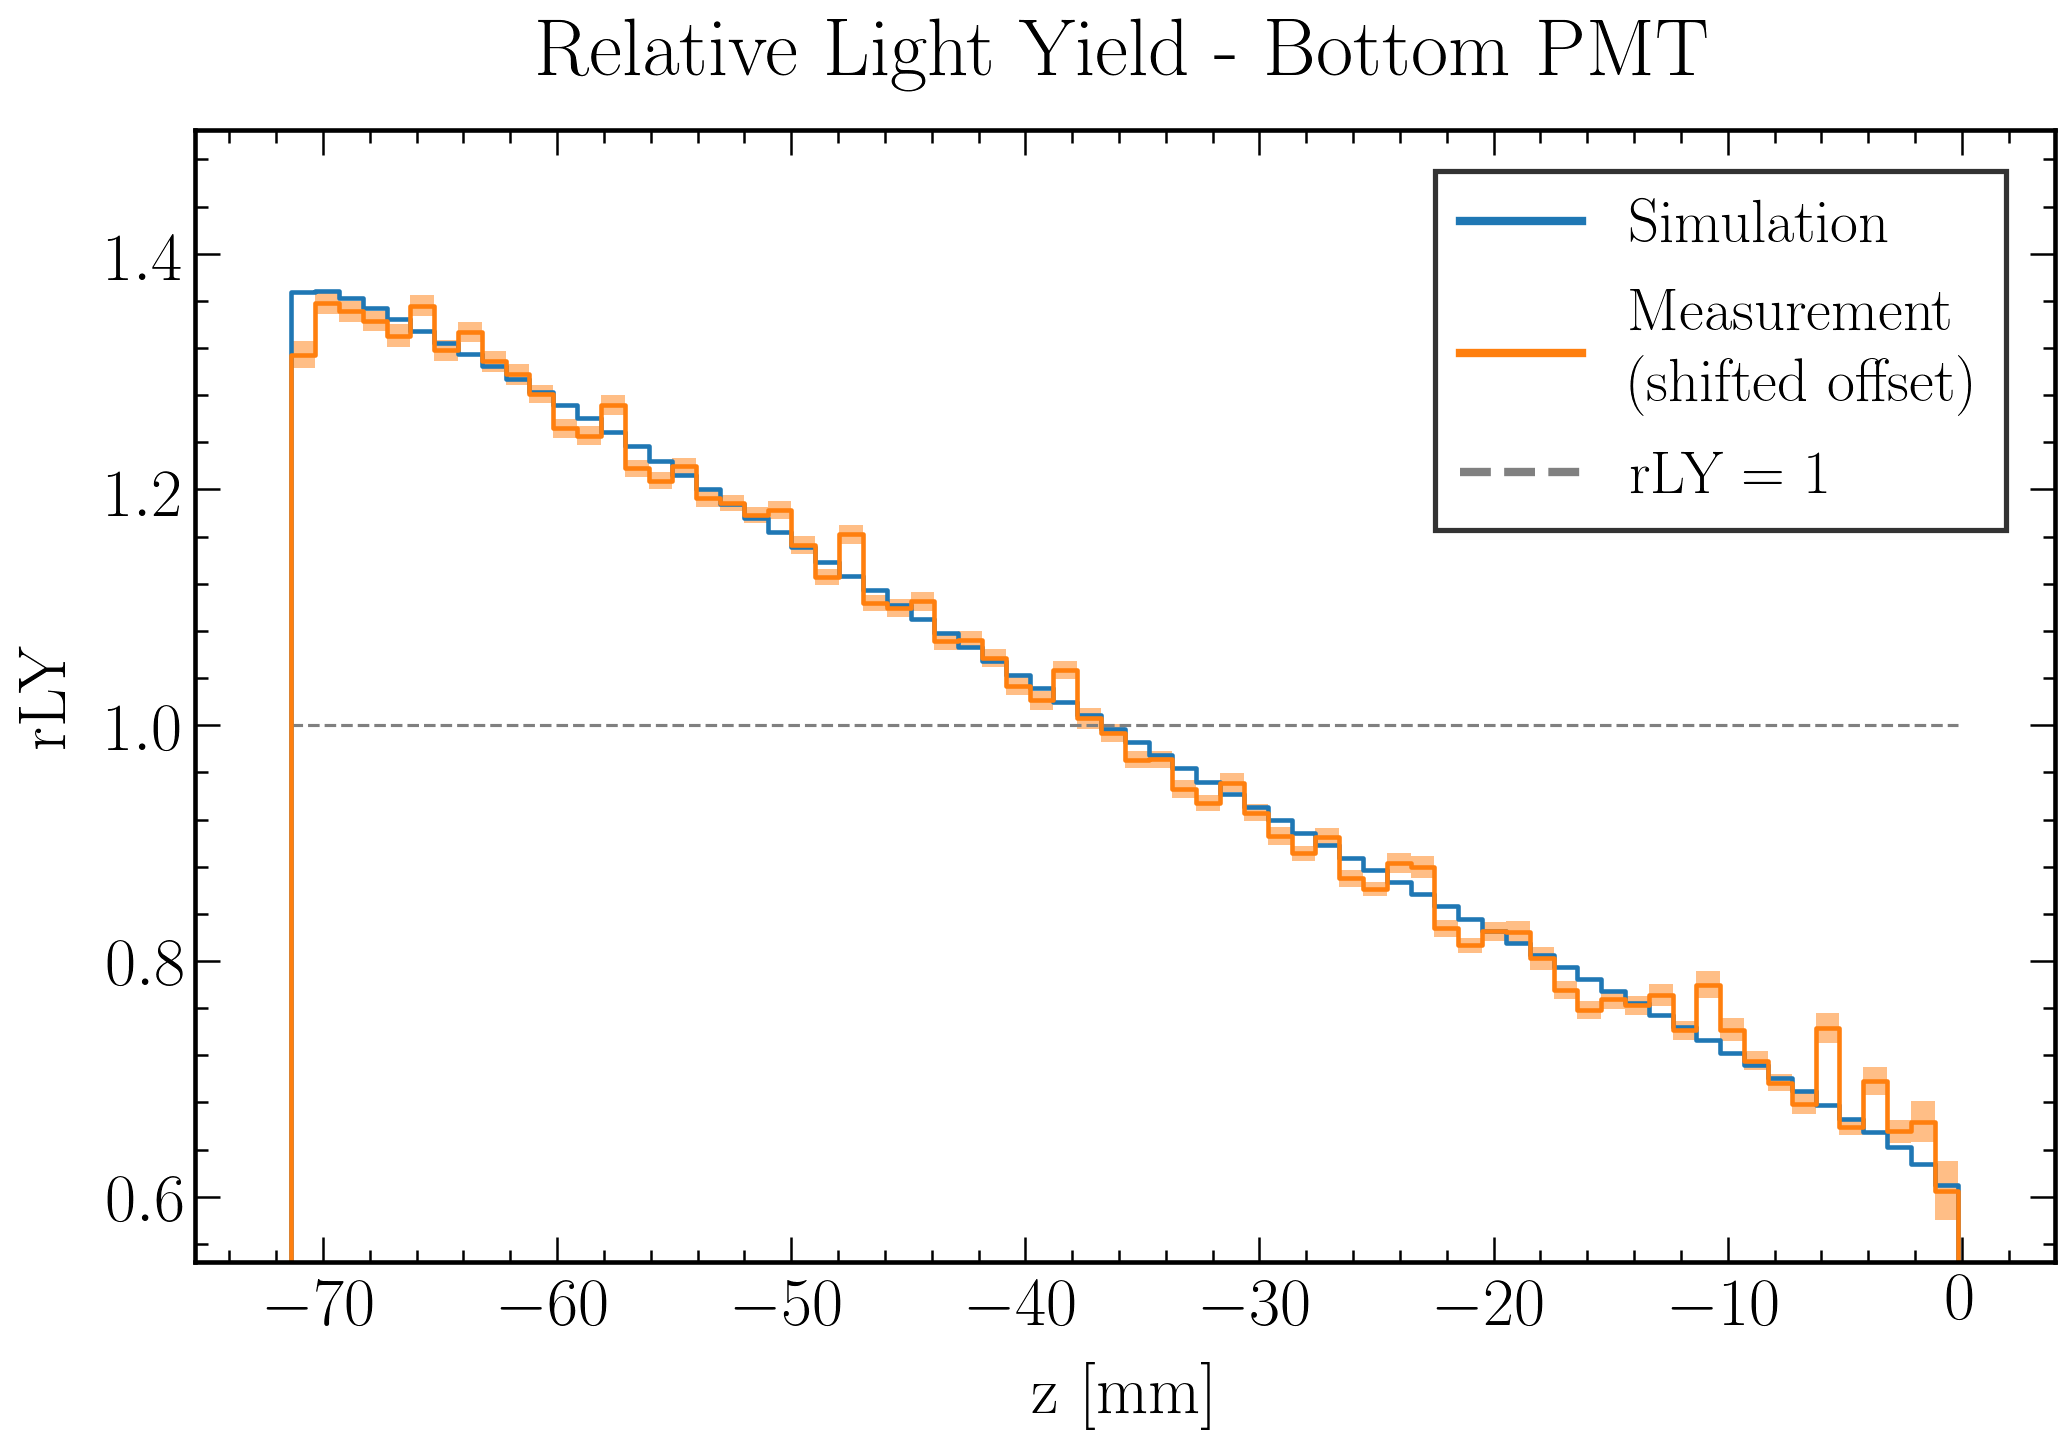

In [145]:
## rLY_sim_default

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

ns = np.concatenate((np.array([0]), rLY_sim_default_bottom, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Simulation', color = 'C0')

ns = np.concatenate((np.array([0]), rLY_meas_bottom_shifted(shift), np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_bottom_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Measurement\n(shifted offset)', color = 'C1')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='C1', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('Relative Light Yield - Bottom PMT', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
plt.ylim(0.9*np.min([np.min(rLY_meas_bottom_shifted(shift)), 
       np.min(rLY_sim_default_bottom)]), 
         1.1*np.max([np.max(rLY_meas_bottom_shifted(shift)), 
       np.max(rLY_sim_default_bottom)]))

fig.savefig(filename_prefix_sim_default+"_vs_"+filename_prefix_meas+"_rLY_z_bottom_shifted_offset.png", bbox_inches='tight')

plt.show()

#### Top

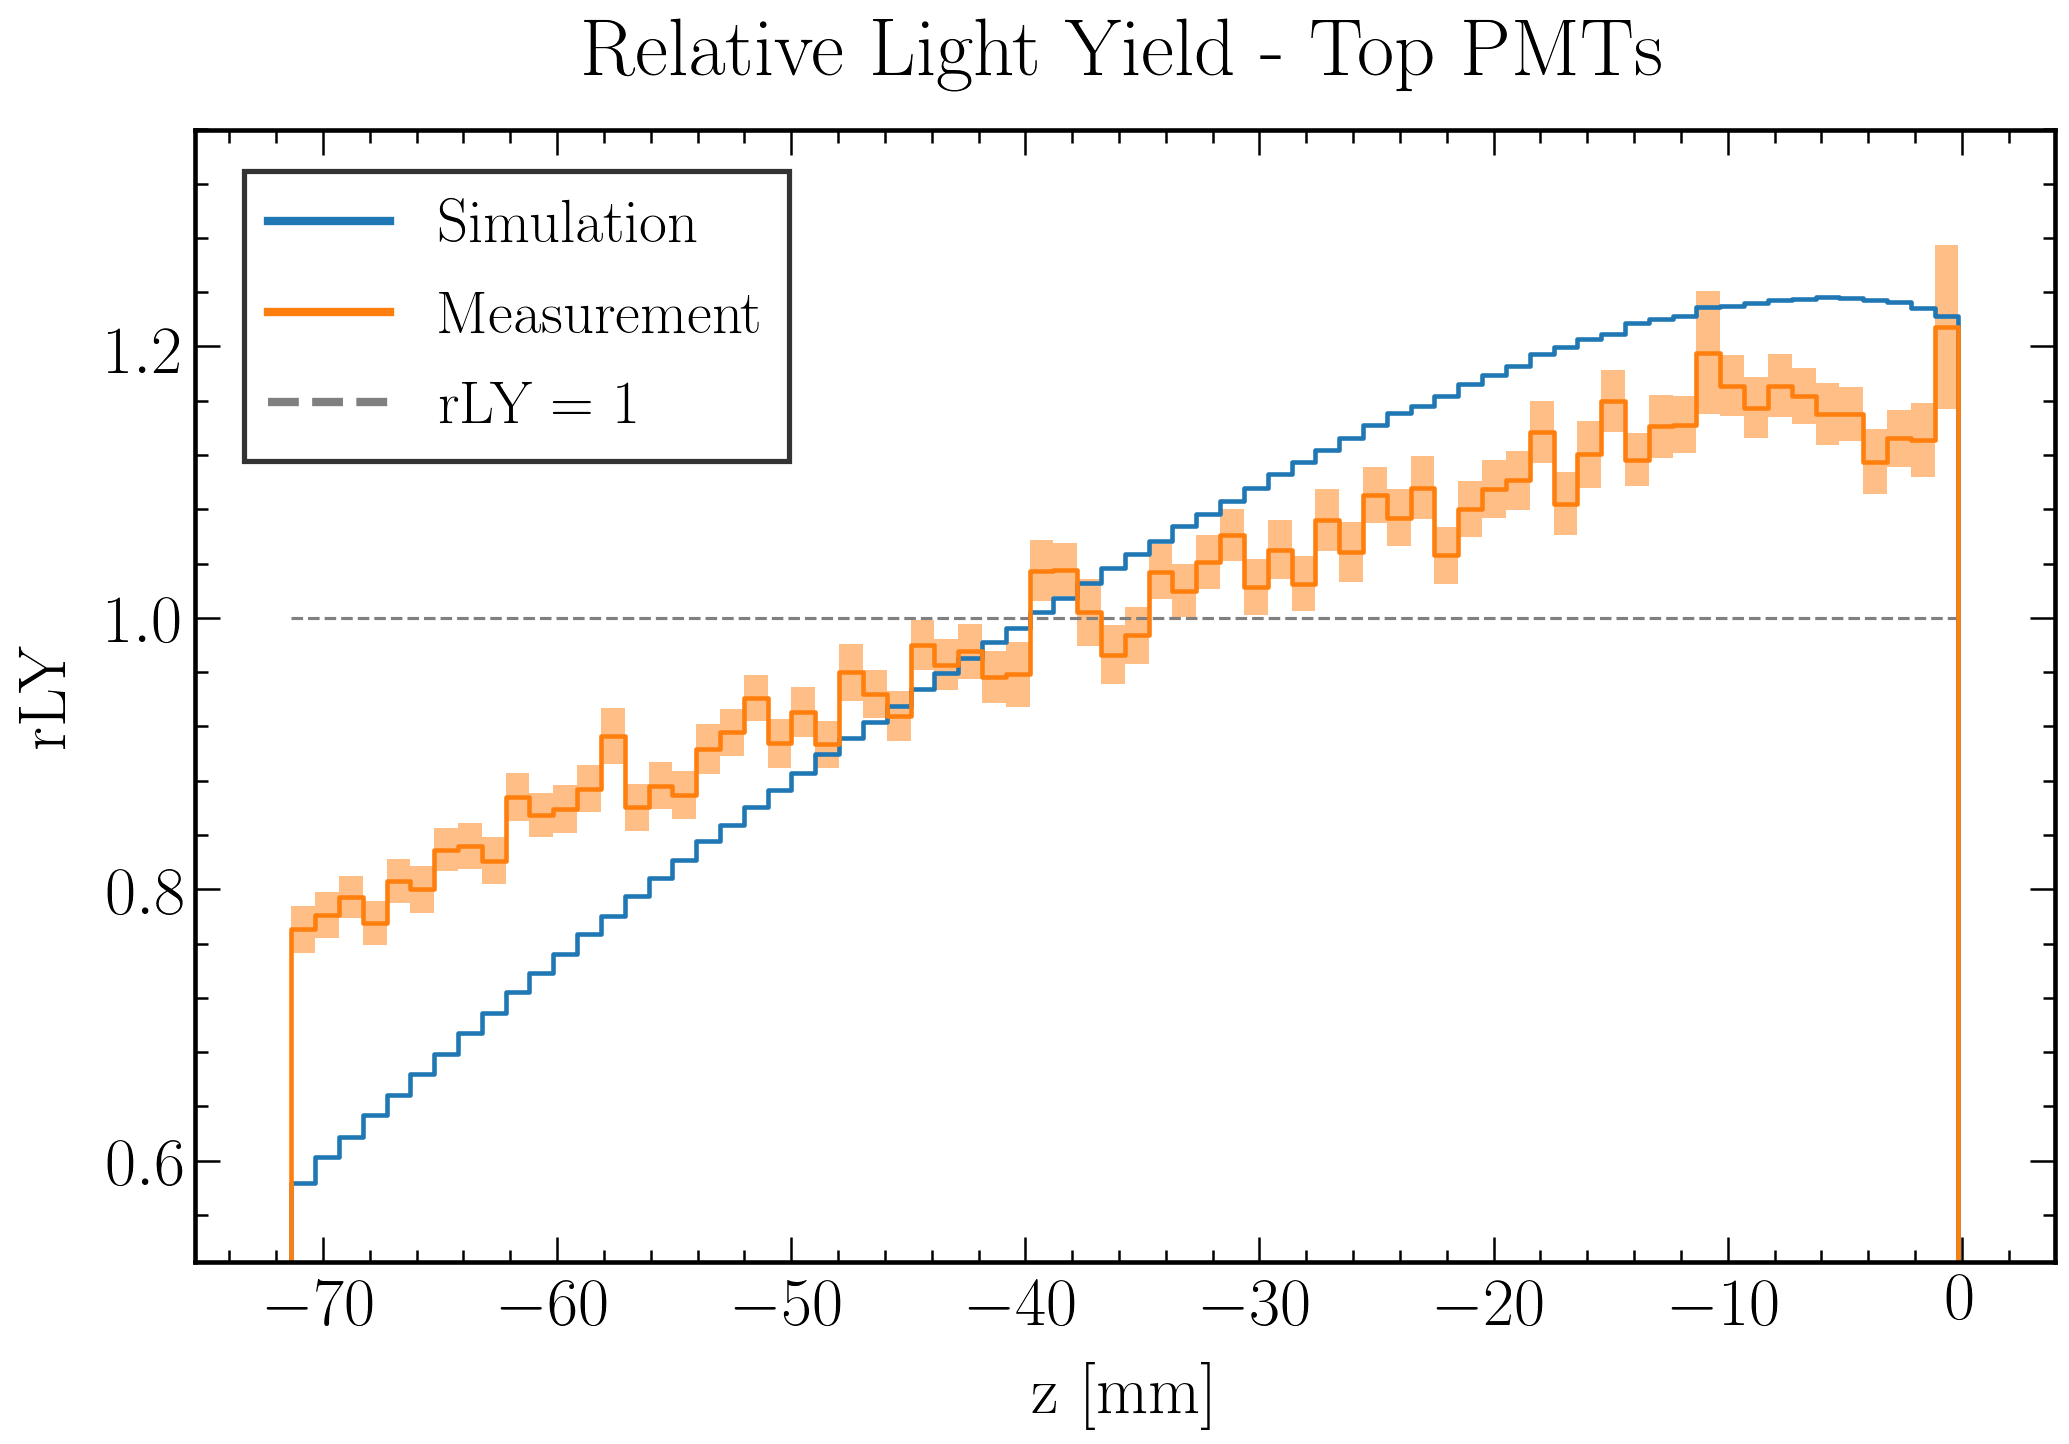

In [58]:
## rLY_sim_default

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

ns = np.concatenate((np.array([0]), rLY_sim_default_top, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Simulation', color = 'C0')

ns = np.concatenate((np.array([0]), rLY_meas_top, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_top_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Measurement', color = 'C1')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='C1', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('Relative Light Yield - Top PMTs', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
plt.ylim(0.9*np.min([np.min(rLY_meas_top), 
       np.min(rLY_sim_default_top)]), 
         1.1*np.max([np.max(rLY_meas_top), 
       np.max(rLY_sim_default_top)]))

fig.savefig(filename_prefix_sim_default+"_vs_"+filename_prefix_meas+"_rLY_z_top.png", bbox_inches='tight')

plt.show()

In [67]:
## Reduced chi-squared statistic
np.sum((rLY_meas_top - rLY_sim_default_top)**2 / (rLY_meas_top_err)**2) / len(rLY_meas_top)

22.37440973744393

#### All

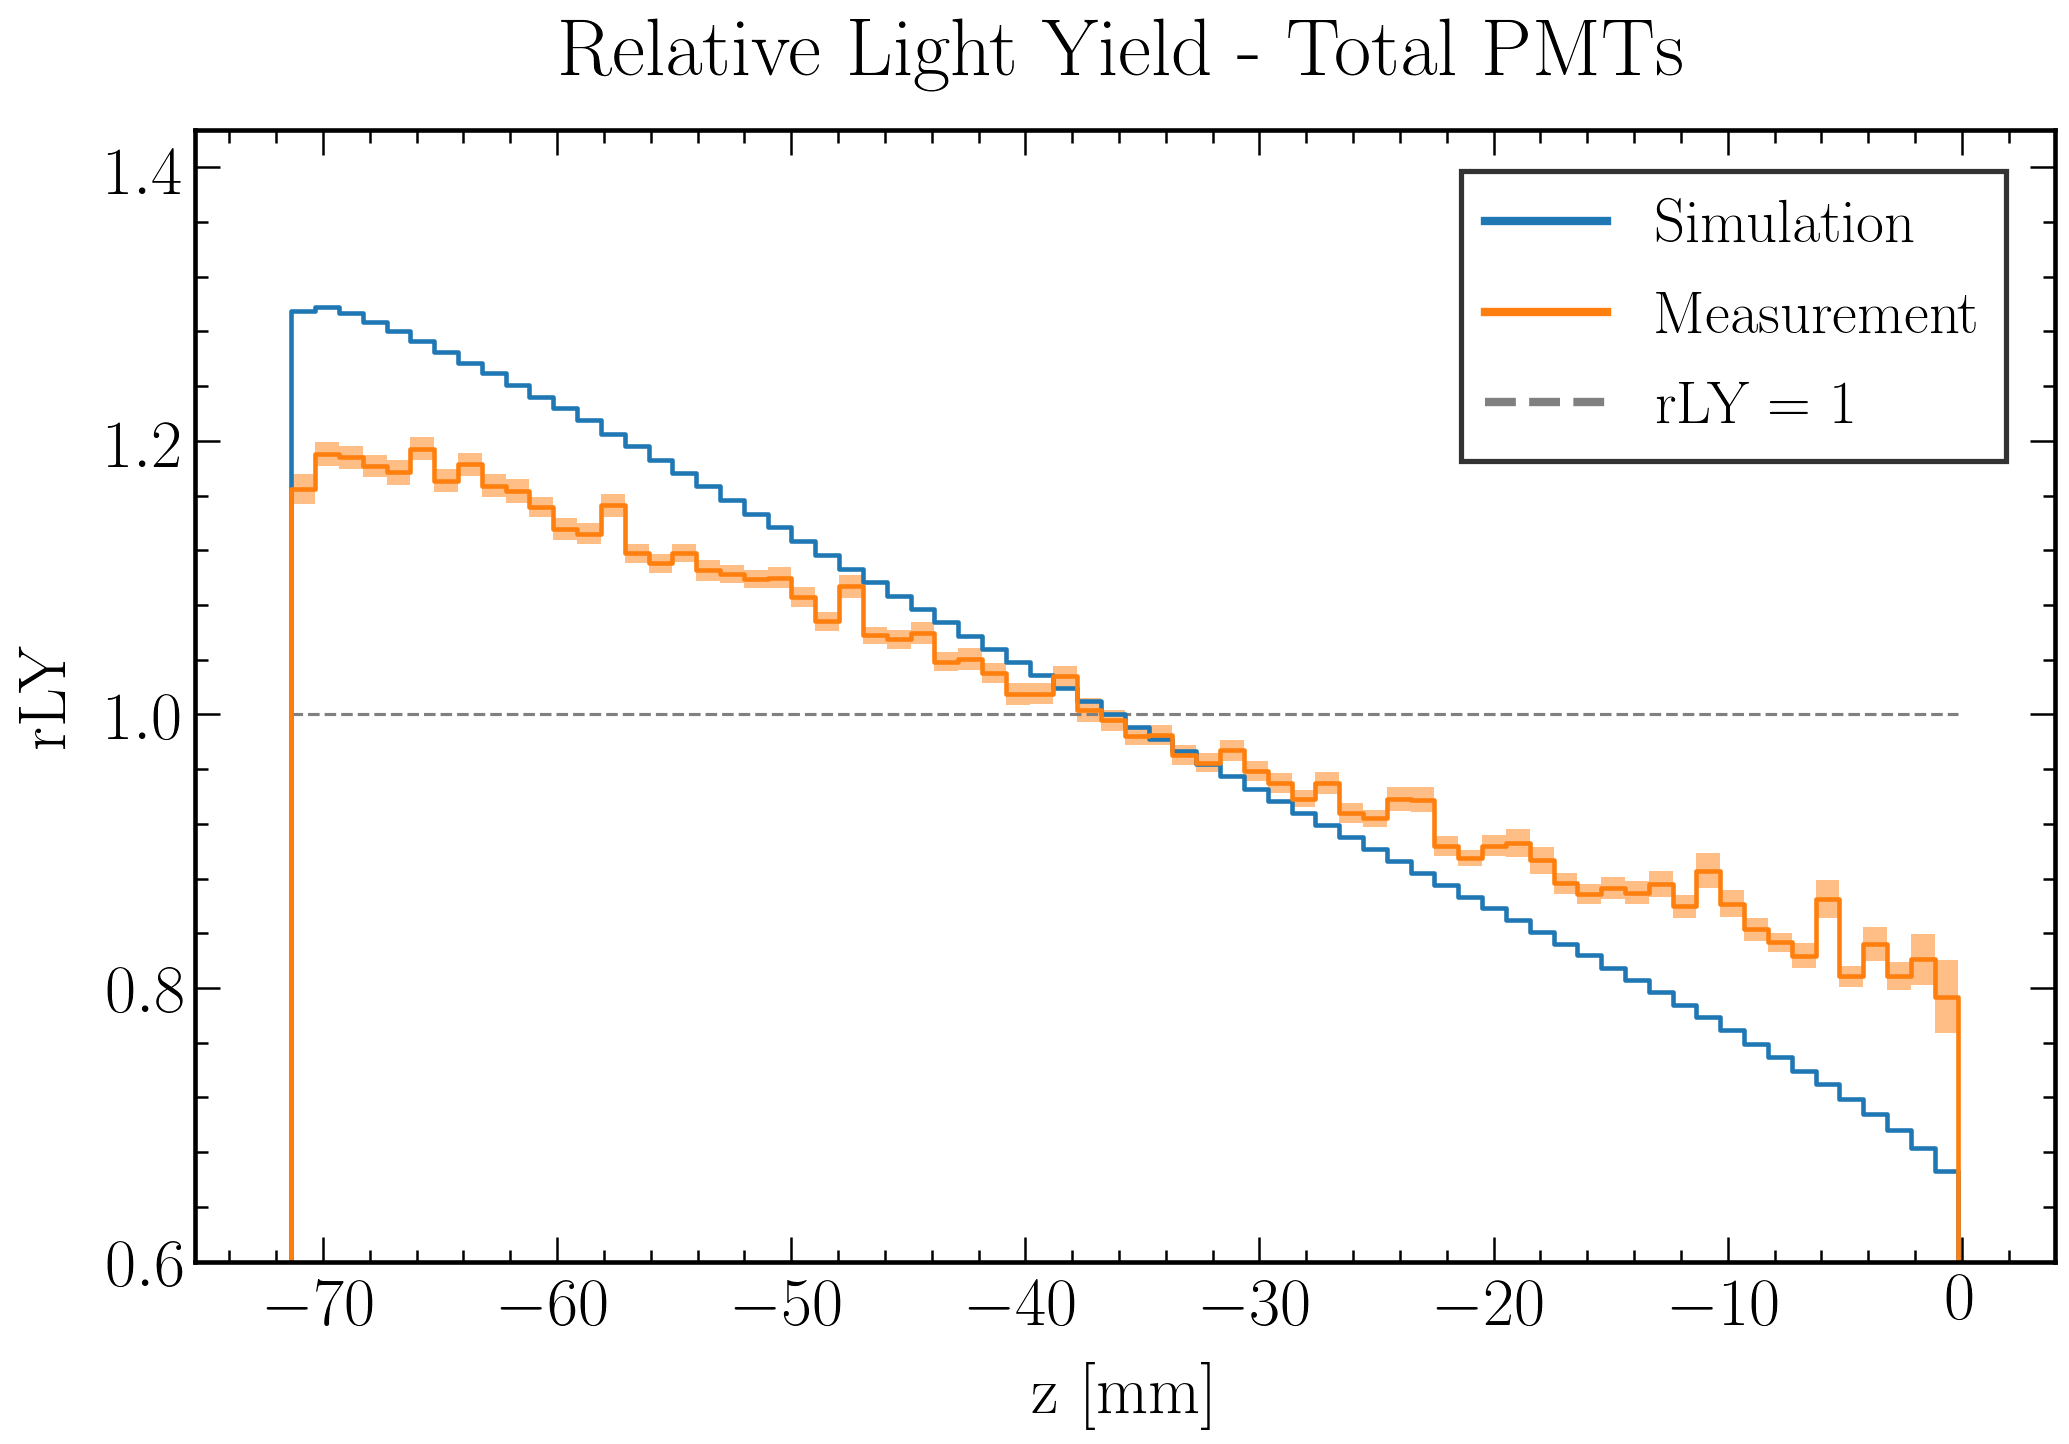

In [59]:
## rLY_sim_default

#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.hlines(1, -71.35, -0.15, colors='gray', linestyles='dashed', label = 'rLY = 1')

ns = np.concatenate((np.array([0]), rLY_sim_default_all, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Simulation', color = 'C0')

ns = np.concatenate((np.array([0]), rLY_meas_all, np.array([0])))
ns_err = np.concatenate((np.array([0]), rLY_meas_all_err, np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Measurement', color = 'C1')
plt.fill_between(bns, ns - ns_err, ns + ns_err, 
                 facecolor='C1', alpha=0.5, step = 'mid')

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('rLY', fontsize = label_size, labelpad = label_pad)
plt.title('Relative Light Yield - Total PMTs', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

# Axes ---> Range
plt.ylim(0.9*np.min([np.min(rLY_meas_all), 
       np.min(rLY_sim_default_all)]), 
         1.1*np.max([np.max(rLY_meas_all), 
       np.max(rLY_sim_default_all)]))

fig.savefig(filename_prefix_sim_default+"_vs_"+filename_prefix_meas+"_rLY_z_total.png", bbox_inches='tight')

plt.show()

In [68]:
## Reduced chi-squared statistic
np.sum((rLY_meas_all - rLY_sim_default_all)**2 / (rLY_meas_all_err)**2) / len(rLY_meas_all)

56.36231782381406

## Fit optical parameters